In [1]:
import numpy as np

In [2]:
#open file for parameters
variables = {}

with open("values.txt") as f:
    for line in f:
        name, value = line.split("=")
        variables[name] = float(value)
#pass in the values
distance = variables["distance"] #assuming we use a square, it is the distance between T_left and T_right
T_left = variables["T_left"] 
T_right = variables["T_right"]
k = variables["k"] #thermal conductivity
hx = hy = distance/2 #divide nodes
#initial boundary condition
T_right = 300
T_left = 280
A = hx*hy/2 #area of the trianglular element
print(distance,T_left,T_right,k,A)

0.2 280 300 1.4 0.005000000000000001


In [3]:
K_tri = np.array([[1,-0.5,0,-0.5,0,0,0,0,0],
         [-0.5,2,-0.5,0,-1,0,0,0,0],
         [0,-0.5,1,0,0,-0.5,0,0,0],
         [-0.5,0,0,2,-1,0,-1/2,0,0],
         [0,-1,0,-1,4,-1,0,-1,0],
         [0,0,-0.5,0,-1,2,0,0,-0.5],
         [0,0,0,-0.5,0,0,1,-0.5,0],
         [0,0,0,0,-1,0,-0.5,2,-0.5],
         [0,0,0,0,-0.5,-0.5,0,-0.5,1]])*k/8/A
print(K_tri) #local matrix K for the triangular element

[[ 35.  -17.5   0.  -17.5   0.    0.    0.    0.    0. ]
 [-17.5  70.  -17.5   0.  -35.    0.    0.    0.    0. ]
 [  0.  -17.5  35.    0.    0.  -17.5   0.    0.    0. ]
 [-17.5   0.    0.   70.  -35.    0.  -17.5   0.    0. ]
 [  0.  -35.    0.  -35.  140.  -35.    0.  -35.    0. ]
 [  0.    0.  -17.5   0.  -35.   70.    0.    0.  -17.5]
 [  0.    0.    0.  -17.5   0.    0.   35.  -17.5   0. ]
 [  0.    0.    0.    0.  -35.    0.  -17.5  70.  -17.5]
 [  0.    0.    0.    0.  -17.5 -17.5   0.  -17.5  35. ]]


In [4]:
F = np.zeros((9,1)) #result matrix F, considering also the boundary condition
F[0] = 280
K_tri[0,:] = 0
K_tri[0,0] = 1
F[3] = 280
K_tri[3,:] = 0
K_tri[3,3] = 1
F[6] = 280
K_tri[6,:] = 0
K_tri[6,6] = 1
F[2] = 300
K_tri[2,:] = 0
K_tri[2,2] = 1
F[5] = 300
K_tri[5,:] = 0
K_tri[5,5] = 1
F[8] = 300
K_tri[8,:] = 0
K_tri[8,8] = 1
K_tri

array([[  1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [-17.5,  70. , -17.5,   0. , -35. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. , -35. ,   0. , -35. , 140. , -35. ,   0. , -35. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. , -35. ,   0. , -17.5,  70. , -17.5],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ]])

In [5]:
U = np.dot(np.linalg.pinv(K_tri), F) #We have K*U = F, this is the formula to calculate U
U = U.reshape((3,3))
U

array([[280., 290., 300.],
       [280., 290., 300.],
       [280., 290., 300.]])

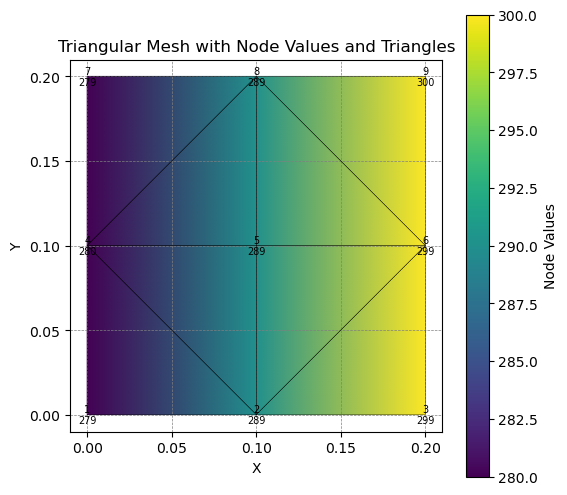

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as tri

# Define the coordinates of the grid points (nodes)
x = [0.0, distance / 2, distance, 0.0, distance / 2, distance, 0.0, distance / 2, distance]
y = [0.0, 0.0, 0.0, distance / 2, distance / 2, distance / 2, distance, distance, distance]

# New triangular elements
triangles = [
    [0, 3, 1],  
    [1, 3, 4],  
    [1, 2, 5], 
    [1, 5, 4],  
    [3, 4, 7],  
    [3, 7, 6],  
    [8, 5, 7],  
    [4, 7, 5],
]

# Values for each node
node_values = U.flatten()

# Create the triangulation
triang = tri.Triangulation(x, y, triangles)

plt.figure(figsize=(6, 6))
plt.tripcolor(triang, node_values, cmap="viridis", shading="gouraud", edgecolors="gray")
plt.colorbar(label="Node Values")
plt.title("Triangular Mesh with Node Values and Triangles")
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(np.linspace(0, 0.2, 5))
plt.yticks(np.linspace(0, 0.2, 5))
plt.gca().set_aspect('equal')
plt.grid(True, linestyle="--", color="gray", linewidth=0.5)


for triangle in triangles:
    coords = [[x[i], y[i]] for i in triangle] + [[x[triangle[0]], y[triangle[0]]]]  # Close the triangle
    plt.plot(*zip(*coords), color="black", linewidth=0.25)

for i, (xi, yi, val) in enumerate(zip(x, y, node_values)):
    plt.text(xi, yi, f"{i+1}\n{int(val)}", color="black", fontsize=7, ha="center", va="center")

plt.show()


In [7]:
np.savetxt("result_tri",U) #save file

In [8]:
#matrix K using rectangular finite elements
def tri_subK_matrix(A, b1, b2, b3, c1, c2, c3):
    A_14 = 1/4/A
    K11 = A_14*(b1**2+c1**2)
    K12 = A_14*(b1*b2+c1*c2)
    K13 = A_14*(b1*b3+c1*c3)
    K23 = A_14*(b2*b3+c2*c3)
    K22 = A_14*(b2**2+c2**2)
    K33 = A_14*(b3**2+c3**2)
    return [K11,K12,K13,K23,K22,K33]

def tri_K_matrix(A, b1, b2, b3, c1, c2, c3):
    A_14 = 1/4/A
    K11 = A_14*(b1**2+c1**2)
    K12 = A_14*(b1*b2+c1*c2)
    K13 = A_14*(b1*b3+c1*c3)
    K23 = A_14*(b2*b3+c2*c3)
    K22 = A_14*(b2**2+c2**2)
    K33 = A_14*(b3**2+c3**2)
    return [K11,K12,K13,K23,K22,K33]

In [9]:
#matrix K using rectangular finite elements
def rec_K_matrix(hx, hy):
    K11 = (hx**2+hy**2)/hx/hy/3 # K22,K33,K44
    K12 = (hx**2-2*hy**2)/hx/hy/6 # K21,K34,K43
    K13 = -(hx**2+hy**2)/hx/hy/6 # K31,K24,K42
    K14 = -(2*hx**2-hy**2)/hx/hy/6 # K41,K23,K32
    return K11,K12,K13,K14

#insert correct index into final K matrix
def fill_index(a,b,c,d):
    K = np.zeros((9,9))
    A,B,C,D = rec_K_matrix(hx,hy)
    K[a,a] = K[b,b] = K[c,c] = K[d,d] = A
    K[a,b] = K[b,a] = K[c,d] = K[d,c] = B
    K[a,c] = K[c,a] = K[b,d] = K[d,b] = C
    K[a,d] = K[d,a] = K[b,c] = K[c,b] = D
    return K

In [10]:
#each call of the function "fill_index" represents one rectangular element
#the index a,b,c,d based on the index of the nodes in the lecture
K_rec = k*(fill_index(0,1,4,3) +  fill_index(1,2,5,4) +  fill_index(3,4,7,6) +  fill_index(4,5,8,7))
F = np.zeros((9,1)) #similar function F considering the boundary condition
F[0] = 280
K_rec[0,:] = 0
K_rec[0,0] = 1
F[3] = 280
K_rec[3,:] = 0
K_rec[3,3] = 1
F[6] = 280
K_rec[6,:] = 0
K_rec[6,6] = 1
F[2] = 300
K_rec[2,:] = 0
K_rec[2,2] = 1
F[5] = 300
K_rec[5,:] = 0
K_rec[5,5] = 1
F[8] = 300
K_rec[8,:] = 0
K_rec[8,8] = 1
K_rec

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.23333333,  1.86666667, -0.23333333, -0.46666667, -0.46666667,
        -0.46666667,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.46666667, -0.46666667, -0.46666667, -0.46666667,  3.73333333,
        -0.46666667, -0.46666667, -0.46666667, -0.46666667],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.46666667, -0

In [11]:
U_rec = np.dot(np.linalg.pinv(K_rec), F)
U_rec = U_rec.reshape((3,3))
np.savetxt("result_rec",U_rec)
U_rec.flatten()

array([280., 290., 300., 280., 290., 300., 280., 290., 300.])

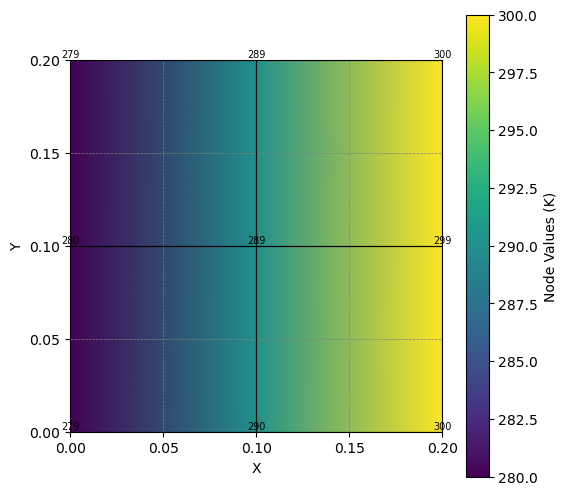

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Node values for a 3x3 grid
node_values = U_rec

x = np.linspace(0, distance, 3)
y = np.linspace(0, distance, 3)
X, Y = np.meshgrid(x, y)

# Plot the gradient
plt.figure(figsize=(6, 6))
plt.pcolormesh(X, Y, node_values, cmap="viridis", shading="gouraud")
plt.colorbar(label="Node Values (K)")
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(np.linspace(0, distance, 5))
plt.yticks(np.linspace(0, distance, 5))
plt.grid(True, linestyle="--", color="gray", linewidth=0.5)
plt.gca().set_aspect('equal')

for i in range(len(x) - 1):
    for j in range(len(y) - 1):
        square_x = [x[i], x[i+1], x[i+1], x[i], x[i]]
        square_y = [y[j], y[j], y[j+1], y[j+1], y[j]]
        plt.plot(square_x, square_y, color="black", linewidth=0.8)

# Annotate the node values
for i in range(node_values.shape[0]):
    for j in range(node_values.shape[1]):
        plt.text(x[j], y[i], f"{int(node_values[i, j])}", color="black", 
                 fontsize=7, ha="center", va="bottom")

plt.show()
